In [141]:
import torch
import torch.nn as nn
from model.vautoencoder import VariationalAutoencoder
from data.ucr_loader import UCRDataset
from utils.common import read_cfg
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter







In [362]:
# model_path = "./out/runs/test/test/test-2022-10-25-07-42-58/autoencoder.pkl"
# model_path = "./out/runs/test/test/test-2022-10-25-09-33-40/autoencoder.pkl"
# model_path = "./out/runs/test/test/test-2022-10-25-10-30-20/autoencoder.pkl"
model_path = "./out/runs/test/test/test-2022-10-25-12-41-39/ae-class.pkl"
cfg = read_cfg("./config/test.yaml")
# model = VariationalAutoencoder(**cfg["autoencoder"])
# model.load_state_dict(torch.load(model_path))
model = torch.load(model_path)

In [363]:
model

VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (layers): ModuleList(
      (0): LSTM(1, 1, batch_first=True)
      (1): RNNExtract()
      (2): Reshape()
      (3): ReLU()
      (4): Linear(in_features=175, out_features=10, bias=True)
    )
    (mu_layer): Linear(in_features=10, out_features=4, bias=True)
    (sigma_layer): Linear(in_features=10, out_features=4, bias=True)
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0): Linear(in_features=4, out_features=24, bias=True)
      (1): ReLU()
      (2): Linear(in_features=24, out_features=175, bias=True)
      (3): ReLU()
      (4): Reshape()
      (5): LSTM(1, 1, batch_first=True)
      (6): RNNExtract()
    )
  )
)

In [364]:
model.to("cuda:0")

VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (layers): ModuleList(
      (0): LSTM(1, 1, batch_first=True)
      (1): RNNExtract()
      (2): Reshape()
      (3): ReLU()
      (4): Linear(in_features=175, out_features=10, bias=True)
    )
    (mu_layer): Linear(in_features=10, out_features=4, bias=True)
    (sigma_layer): Linear(in_features=10, out_features=4, bias=True)
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0): Linear(in_features=4, out_features=24, bias=True)
      (1): ReLU()
      (2): Linear(in_features=24, out_features=175, bias=True)
      (3): ReLU()
      (4): Reshape()
      (5): LSTM(1, 1, batch_first=True)
      (6): RNNExtract()
    )
  )
)

In [365]:
dset = UCRDataset(**cfg["data"], cache_location="adsdssdd")

In [366]:
x,_ = dset.__getitem__(70)
x2,_ = dset.__getitem__(175+78)
x3,_ = dset.__getitem__(2*175+150)

x = torch.Tensor(x).to("cuda:0")
x2 = torch.Tensor(x2).to("cuda:0")
x3 = torch.Tensor(x3).to("cuda:0")

In [367]:
z = model.encoder(x)
rec = model.decoder(z)

z2 = model.encoder(x2)
z3 = model.encoder(x3)

In [368]:
new_z = []
for i in range(50):
    new_zz = z + torch.normal(mean=torch.zeros(4).to("cuda:0"), std=torch.zeros(4).to("cuda:0")+0.1)
    dec = model.decoder(new_zz)
    new_z.append(dec)
#     new_zz = z2 + torch.normal(mean=torch.zeros(4).to("cuda:0"), std=torch.zeros(4).to("cuda:0")+0.1)
#     dec = model.decoder(new_zz)
#     new_z.append(dec)
#     new_zz = z3 + torch.normal(mean=torch.zeros(4).to("cuda:0"), std=torch.zeros(4).to("cuda:0")+0.1)
#     dec = model.decoder(new_zz)
#     new_z.append(dec)

new_z = torch.concat(new_z)
new_z = torch.mean(new_z, axis=0)
print(new_z.shape)

# new_z = torch.mean(torch.concat([new_z, new_z2, new_z3]),axis=0)
# print(new_z)
new_z = savgol_filter(new_z.detach().cpu().numpy().reshape(175), 40,5)
# new_rec = model.decoder(new_z)
# mse = torch.mean((x-new_z)**2)

torch.Size([175, 1])


In [126]:
mse, z

(tensor(0.0037, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor([[-0.4757,  2.3232,  1.0797, -1.3037]], device='cuda:0',
        grad_fn=<AddBackward0>))

tensor([ 2.2811,  1.2796, -0.8305,  0.2246], device='cuda:0')


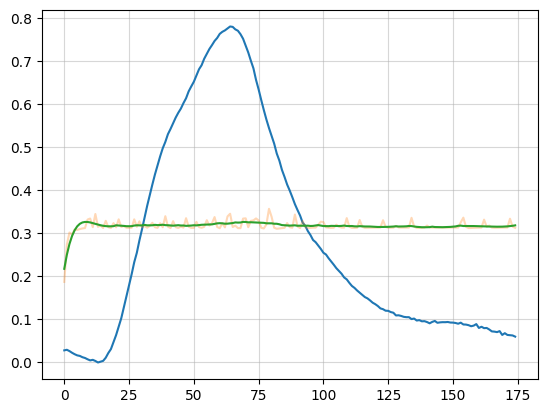

In [369]:
sample = torch.normal(mean=torch.zeros(4)).to("cuda:0")
print(sample)
resp = model.decoder(sample).to("cuda:0")

plt.plot(np.arange(175), x.detach().cpu().reshape(175,1))
# plt.plot(np.arange(175), x2.detach().cpu().reshape(175,1))
# plt.plot(np.arange(175), x3.detach().cpu().reshape(175,1))
# plt.plot(np.arange(175), resp.detach().cpu().numpy().reshape(175,1))
plt.plot(np.arange(175), rec.cpu().detach().reshape(175,1), alpha=0.3)
plt.plot(np.arange(175), new_z)
plt.grid(alpha=0.5)
plt.show()



